# EDA2

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [4]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Daily needs\DS Assingments\EDA2\EDA2\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
# In this dataset no missing values are present

# Data Preprocessing


In [10]:
# 2. Scaling (Standard & Min-Max)
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standard_scaled = df.copy()
df_standard_scaled[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

In [11]:
# When to use which scaling?
# - StandardScaler: when data is normally distributed (z-score normalization)
# - MinMaxScaler: when you need values in fixed range (e.g., 0-1) or for models sensitive to scale (e.g., neural nets)

In [12]:
# 3. Encoding Techniques

categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
encoded_df = df.copy()

# One-Hot Encoding for low-cardinality features
low_cardinality = [col for col in categorical_cols if df[col].nunique() < 5]
encoded_df = pd.get_dummies(encoded_df, columns=low_cardinality, drop_first=True)

# Label Encoding for high-cardinality features
high_cardinality = [col for col in categorical_cols if df[col].nunique() >= 5]
label_encoder = LabelEncoder()
for col in high_cardinality:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

print("\nAfter Encoding Shape:", encoded_df.shape)


After Encoding Shape: (32561, 15)


In [13]:
low_cardinality

['sex']

In [14]:
high_cardinality

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [15]:
# Pros & Cons:
# - One-Hot: No ordinal assumption but increases dimensionality.
# - Label: Compact but assumes ordinal relationship (not always true).

# Feature Engineering

In [17]:
# 4. Create new features
encoded_df['capital_diff'] = encoded_df['capital_gain'] - encoded_df['capital_loss']

encoded_df['hours_category'] = pd.cut(encoded_df['hours_per_week'],
                                      bins=[0, 25, 40, 60, 100],
                                      labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])


In [18]:
# Apply Log transform 
encoded_df['capital_gain_log'] = np.log1p(encoded_df['capital_gain'])

In [19]:
encoded_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Male,capital_diff,hours_category,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,<=50K,1,2174,Full-time,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,<=50K,1,0,Part-time,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,<=50K,1,0,Full-time,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,<=50K,1,0,Full-time,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,<=50K,0,0,Full-time,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,<=50K,0,0,Full-time,0.000000
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,>50K,1,0,Full-time,0.000000
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,<=50K,0,0,Full-time,0.000000
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,<=50K,1,0,Part-time,0.000000


# Feature Selection

In [21]:
# 5. Outlier Detection with Isolation Forest

In [22]:
iso = IsolationForest(contamination=0.01, random_state=42)

iso.fit(encoded_df[numeric_cols])
ypred = iso.predict(encoded_df[numeric_cols])
ypred

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
encoded_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Male,capital_diff,hours_category,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,<=50K,1,2174,Full-time,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,<=50K,1,0,Part-time,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,<=50K,1,0,Full-time,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,<=50K,1,0,Full-time,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,<=50K,0,0,Full-time,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,<=50K,0,0,Full-time,0.000000
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,>50K,1,0,Full-time,0.000000
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,<=50K,0,0,Full-time,0.000000
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,<=50K,1,0,Part-time,0.000000


In [24]:
df['Outliers'] = ypred
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Outliers
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1


In [25]:
df[df['Outliers'] == -1]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Outliers
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,-1
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K,-1
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K,-1
387,44,Private,162028,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,2415,6,United-States,>50K,-1
405,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States,>50K,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32035,40,Private,566537,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,<=50K,-1
32090,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K,-1
32238,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K,-1
32341,74,Self-emp-not-inc,199136,Bachelors,13,Widowed,Craft-repair,Not-in-family,White,Male,15831,0,8,Germany,>50K,-1


In [26]:
# here 3725 rows contains outliers which can generate inconsistency in the data set 
# we can remove the outliers to imporve the accuracy of the model 

In [27]:
# 6. PPS vs Correlation

In [28]:
!pip install ppscore

In [29]:
import ppscore as ps

In [30]:
ps.score(df, x='age',y = 'income')

{'x': 'age',
 'y': 'income',
 'ppscore': 0.005415334901707637,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6531153390987711,
 'model_score': 0.6549938357098165,
 'model': DecisionTreeClassifier()}

In [31]:
ps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.011232,classification,True,weighted F1,0.579088,0.583816,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.052315,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
251,Outliers,capital_loss,0.000000,regression,True,mean absolute error,94.942600,176.485242,DecisionTreeRegressor()
252,Outliers,hours_per_week,0.000000,regression,True,mean absolute error,7.656400,7.784342,DecisionTreeRegressor()
253,Outliers,native_country,0.000000,classification,True,weighted F1,0.841082,0.841082,DecisionTreeClassifier()
254,Outliers,income,0.049066,classification,True,weighted F1,0.653115,0.670136,DecisionTreeClassifier()


In [32]:
feature_sel = ps.matrix(encoded_df)

In [33]:
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.742600,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.759000,2.806164,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
319,capital_gain_log,income,0.297578,classification,True,weighted F1,0.653115,0.756341,DecisionTreeClassifier()
320,capital_gain_log,sex_ Male,0.000000,regression,True,mean absolute error,0.336000,0.441472,DecisionTreeRegressor()
321,capital_gain_log,capital_diff,0.845392,regression,True,mean absolute error,1188.826600,183.802096,DecisionTreeRegressor()
322,capital_gain_log,hours_category,0.055588,classification,True,weighted F1,0.421992,0.454122,DecisionTreeClassifier()


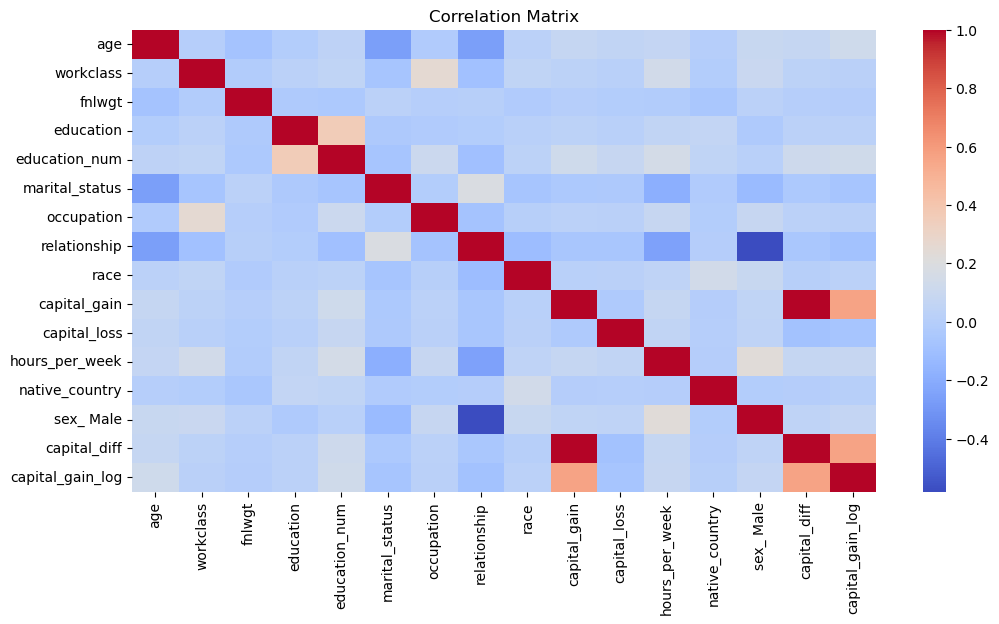

In [34]:
# Plot correlation
corr_matrix = encoded_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

In [35]:
# PPS Score (only top predictive features)
pps_matrix = pps.matrix(encoded_df)
pps_sorted = pps_matrix[pps_matrix['x'] != pps_matrix['y']].sort_values(by='ppscore', ascending=False)
print("\nTop PPS Scores:\n", pps_sorted.head(10))



Top PPS Scores:
                     x                 y   ppscore            case  \
58          education     education_num  1.000000      regression   
75      education_num         education  1.000000      regression   
214    hours_per_week    hours_category  0.999652  classification   
179      capital_gain  capital_gain_log  0.998032      regression   
287      capital_diff  capital_gain_log  0.998032      regression   
279      capital_diff      capital_gain  0.996354      regression   
280      capital_diff      capital_loss  0.996118      regression   
315  capital_gain_log      capital_gain  0.996114      regression   
177      capital_gain      capital_diff  0.845595      regression   
321  capital_gain_log      capital_diff  0.845392      regression   

     is_valid_score               metric  baseline_score  model_score  \
58             True  mean absolute error        1.853000     0.000000   
75             True  mean absolute error        2.759000     0.000000   
214

In [36]:
# Here we have performed EDA2 in which we conducted Encoding Techniques, Isoloation forest for outlier detection and PPS score 
# we can easily detect the outliers present in the dataset
# relation between the columns can be identified using PPS score for better performance of the model